# Veloce Gain

Steps:
1. measure bias overscan + remove gaps
2. get master flat
3. extract flats to get flux in fibers 
4. determine flux ratio on quadrants crossings

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from matplotlib.patches import Rectangle

In [ ]:
from simple_veloce_reduction import veloce_reduction_tools, veloce_config, veloce_extraction

In [3]:
%matplotlib inline

### Load observations list

In [4]:
arm_number = {'red': 3, 'green': 2, 'blue': 1}

In [5]:
# amp_mode = 4
data_path = '/home/usqobserver2/VeloceData'
# run = 'WASP189b'
run = 'CSV_Run'
config, veloce_paths = veloce_config.load_config('config.yaml')

In [6]:
veloce_paths.input_dir = os.path.join(data_path, run)

In [7]:
obs_list = veloce_config.load_run_logs(
            config['science_targets'], config['arm'], veloce_paths)

In [8]:
arm = 'red'
# arm = 'green'
# arm = 'blue'

### Now starting to work on gain

In [9]:
night = '230826'
# night = '240410'
filename = obs_list[f'flat_{arm}'][night][0]
ccd = f'ccd_{arm_number[arm]}'
amp_mode = config['amplifier_mode']
# amp_mode = 2

In [10]:
flat_filename =  os.path.join(veloce_paths.input_dir, night, ccd, filename)


In [11]:
with fits.open(flat_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

In [12]:
ylen, xlen = image_data.shape
xdiv, ydiv = int(xlen/2), int(ylen/2)
overscan_range = 32

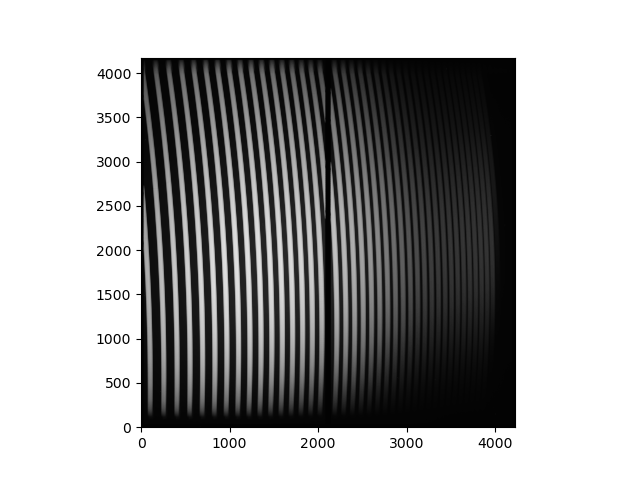

In [88]:
plt.imshow(image_data, cmap='gray', origin='lower', norm='symlog')

In [89]:
np.mean(image_data), np.median(image_data), np.std(image_data), np.min(image_data), np.max(image_data)

(3343.493630347567, 1340.0, 4597.845123029553, 979, 32278)

In [15]:
# Q1
# plt.imshow(image_data[ydiv+overscan_range:ylen-overscan_range,overscan_range:xdiv-overscan_range], cmap='gray', origin='lower', norm='symlog')

In [16]:
# Q2
# plt.imshow(image_data[overscan_range:ydiv-overscan_range, overscan_range:xdiv-overscan_range], cmap='gray', origin='lower', norm='symlog')

In [17]:
# Q3
# plt.imshow(image_data[overscan_range:ydiv-overscan_range,xdiv+overscan_range:xlen-overscan_range], cmap='gray', origin='lower', norm='symlog')

In [18]:
# Q4
# plt.imshow(image_data[ydiv+overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range], cmap='gray', origin='lower', norm='symlog')

In [18]:
# plt.figure()
# plt.imshow(image_data[int(ylen/2)-200:int(ylen/2)-32,200:2000], cmap='gray', norm="symlog", origin='lower')
# plt.show()

In [19]:
# q00 = image_data[int(ylen/2)-100:int(ylen/2)-32, 200:2000].flatten()
# q00.shape

In [20]:
# plt.figure()
# plt.imshow(image_data[int(ylen/2)+32:int(ylen/2)+200,200:2000], cmap='gray', norm="symlog", origin='lower')
# plt.show()

In [21]:
# q01 = image_data[int(ylen/2)+32:int(ylen/2)+100, 200:2000].flatten()

In [22]:
# plt.plot(range(len(q00)), sorted(q00))
# plt.plot(range(len(q01)), sorted(q01))
# plt.show()

In [23]:
# np.median(sorted(q00)[90000:100000])/np.median(sorted(q01)[90000:100000])

In [24]:
# fig, ax = plt.subplots(1, 2, figsize=(3, 8))
# ax[0].imshow(image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)-42:int(xlen/2)-32], cmap='gray', norm="symlog")
# ax[1].imshow(image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)+32:int(xlen/2)+42], cmap='gray', norm="symlog")
# plt.show()

In [25]:
# %matplotlib widget

### Measure horizontal gain ratio

- red Q4/Q1

In [90]:
%matplotlib widget

In [91]:
plt.close('all')

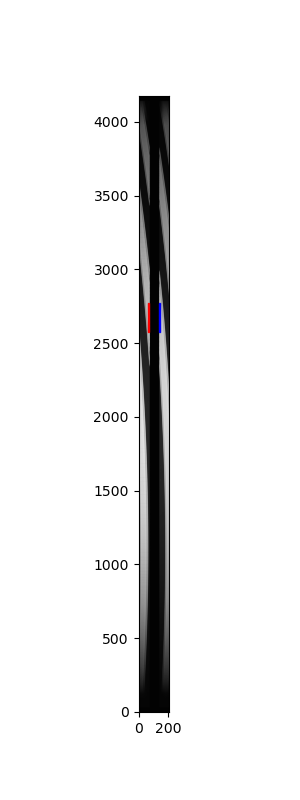

In [100]:
# 1
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
# ax.imshow(image_data[int(ylen/2)+0:, int(xlen/2)-62:int(xlen/2)+62], cmap='gray', norm="log", origin='lower')
ax.imshow(image_data[:, int(xlen/2)-102:int(xlen/2)+102], cmap='gray', norm="log", origin='lower')

rect = Rectangle((60, 2575), 10, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = Rectangle((70+64, 2575), 10, 200, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.show()

In [ ]:
# q1_1 = image_data[int(ylen/2)+40:int(ylen/2)+190,int(xlen/2)-42:int(xlen/2)-32]
# q4_1 = image_data[int(ylen/2)+40:int(ylen/2)+190,int(xlen/2)+32:int(xlen/2)+42]

q1_1 = image_data[1520:1860,int(xlen/2)-42:int(xlen/2)-32]
q4_1 = image_data[1520:1860,int(xlen/2)+32:int(xlen/2)+42]

q1_2 = image_data[2575:2775,int(xlen/2)-42:int(xlen/2)-32]
q4_2 = image_data[2575:2775,int(xlen/2)+32:int(xlen/2)+42]

q1_3 = image_data[3565:3685,int(xlen/2)-42:int(xlen/2)-32]
q4_3 = image_data[3565:3685,int(xlen/2)+32:int(xlen/2)+42]

In [62]:
np.median(q4_1)/np.median(q1_1), np.mean(q4_1)/np.mean(q1_1)

(1.019245744799199, 1.0222894156063955)

In [69]:
np.median(q4_2)/np.median(q1_2), np.mean(q4_2)/np.mean(q1_2)

(1.01608130708864, 1.017884337692247)

In [75]:
np.median(q4_3)/np.median(q1_3), np.mean(q4_3)/np.mean(q1_3)

(1.0119470455279302, 1.0109534573410888)

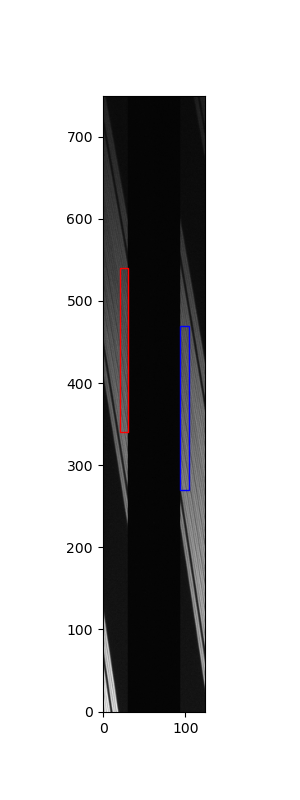

In [115]:
# green 2
fig, ax = plt.subplots(1, 1, figsize=(3, 8))
ax.imshow(image_data[int(ylen/2)+1100:int(ylen/2)+1850, int(xlen/2)-62:int(xlen/2)+62], cmap='gray', norm="symlog", origin='lower')

# Add a rectangle to outline the region
rect = Rectangle((20, 340), 10, 200, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = Rectangle((30+64, 270), 10, 200, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.show()

In [ ]:
q1_2 = image_data[int(ylen/2)+1440:int(ylen/2)+1560,int(xlen/2)-42:int(xlen/2)-32]
q4_2 = image_data[int(ylen/2)+1440:int(ylen/2)+1560,int(xlen/2)+32:int(xlen/2)+42]
# q1_2 = image_data[int(ylen/2)+1440:int(ylen/2)+1640,int(xlen/2)-42:int(xlen/2)-32]
# q4_2 = image_data[int(ylen/2)+1370:int(ylen/2)+1570,int(xlen/2)+32:int(xlen/2)+42]

In [124]:
np.median(q4_2)/np.median(q1_2), np.mean(q4_2)/np.mean(q1_2)

(1.0025823111684957, 1.0012404986643875)

In [90]:
# q1_1 = image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)-42:int(xlen/2)-32]
# q4_1 = image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)+32:int(xlen/2)+42]

In [ ]:
# np.median(q4_1)/np.median(q1_1), np.mean(q4_1)/np.mean(q1_1)

(1.0422528402223834, 1.049330726205928)

In [ ]:
# q2_2 = image_data[int(ylen/2)+1500:int(ylen/2)+1725,int(xlen/2)-42:int(xlen/2)-32]
# q3_2 = image_data[int(ylen/2)+1420:int(ylen/2)+1645,int(xlen/2)+32:int(xlen/2)+42]

In [ ]:
# q1_2 = image_data[int(ylen/2)+1515:int(ylen/2)+1635,int(xlen/2)-42:int(xlen/2)-32]
# q4_2 = image_data[int(ylen/2)+1515:int(ylen/2)+1635,int(xlen/2)+32:int(xlen/2)+42]

In [ ]:
# np.median(q4_2)/np.median(q1_2), np.mean(q4_2)/np.mean(q1_2)

(1.0384818133895624, 1.0384137003186655)

In [ ]:
# def determine_gain_ratios_h(image):
#     """
#     Red arm horizontal gain ratios for 4 amplifier mode.
#     """
#     ylen, xlen = image.shape

#     q1_1 = image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)-42:int(xlen/2)-32]
#     q4_1 = image_data[int(ylen/2)+525:int(ylen/2)+725,int(xlen/2)+32:int(xlen/2)+42]

#     q1_2 = image_data[int(ylen/2)+1515:int(ylen/2)+1635,int(xlen/2)-42:int(xlen/2)-32]
#     q4_2 = image_data[int(ylen/2)+1515:int(ylen/2)+1635,int(xlen/2)+32:int(xlen/2)+42]

#     return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2)

In [101]:
def determine_gain_ratios_h(image):
    """
    Red arm horizontal gain ratios for 2 amplifier mode.
    """
    # ylen, xlen = image.shape

    q1_1 = image[2575:2775,int(xlen/2)-42:int(xlen/2)-32]
    q4_1 = image[2575:2775,int(xlen/2)+32:int(xlen/2)+42]

    q1_2 = image[3565:3685,int(xlen/2)-42:int(xlen/2)-32]
    q4_2 = image[3565:3685,int(xlen/2)+32:int(xlen/2)+42]

    return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2)

In [ ]:
# def determine_gain_ratios_h(image):
#     """
#     Green arm horizontal gain ratios for 4 amplifier mode.
#     """
#     ylen, xlen = image.shape

#     q1_1 = image_data[int(ylen/2)+680:int(ylen/2)+860,int(xlen/2)-42:int(xlen/2)-32]
#     q4_1 = image_data[int(ylen/2)+680:int(ylen/2)+860,int(xlen/2)+32:int(xlen/2)+42]

#     q1_2 = image_data[int(ylen/2)+1440:int(ylen/2)+1560,int(xlen/2)-42:int(xlen/2)-32]
#     q4_2 = image_data[int(ylen/2)+1440:int(ylen/2)+1560,int(xlen/2)+32:int(xlen/2)+42]

#     return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2)

In [78]:
def determine_gain_ratios_h(image):
    """
    Green arm horizontal gain ratios for 2 amplifier mode.
    """
    # ylen, xlen = image.shape

    q1_1 = image[1520:1860,int(xlen/2)-42:int(xlen/2)-32]
    q4_1 = image[1520:1860,int(xlen/2)+32:int(xlen/2)+42]

    q1_2 = image[2750:2920,int(xlen/2)-42:int(xlen/2)-32]
    q4_2 = image[2750:2920,int(xlen/2)+32:int(xlen/2)+42]

    q1_3 = image[3510:3630,int(xlen/2)-42:int(xlen/2)-32]
    q4_3 = image[3510:3630,int(xlen/2)+32:int(xlen/2)+42]

    return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2), np.median(q4_3)/np.median(q1_3)

In [ ]:
# def determine_gain_ratios_h(image):
#     """
#     Blue arm horizontal gain ratios for 4 amplifier mode.
#     """
#     ylen, xlen = image.shape

#     q1_1 = image_data[int(ylen/2)+40:int(ylen/2)+190,int(xlen/2)-42:int(xlen/2)-32]
#     q4_1 = image_data[int(ylen/2)+40:int(ylen/2)+190,int(xlen/2)+32:int(xlen/2)+42]

#     q1_2 = image_data[int(ylen/2)+740:int(ylen/2)+890,int(xlen/2)-42:int(xlen/2)-32]
#     q4_2 = image_data[int(ylen/2)+740:int(ylen/2)+890,int(xlen/2)+32:int(xlen/2)+42]

#     return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2)

In [ ]:
# def determine_gain_ratios_h(image):
#     """
#     Blue arm horizontal gain ratios for 2 amplifier mode.
#     """
#     # ylen, xlen = image.shape

#     q1_1 = image_data[800:950,int(xlen/2)-42:int(xlen/2)-32]
#     q4_1 = image_data[800:950,int(xlen/2)+32:int(xlen/2)+42]

#     q1_2 = image_data[2040:2260,int(xlen/2)-42:int(xlen/2)-32]
#     q4_2 = image_data[2040:2260,int(xlen/2)+32:int(xlen/2)+42]

#     q1_3 = image_data[2820:2940,int(xlen/2)-42:int(xlen/2)-32]
#     q4_3 = image_data[2820:2940,int(xlen/2)+32:int(xlen/2)+42]

#     return np.median(q4_1)/np.median(q1_1), np.median(q4_2)/np.median(q1_2), np.median(q4_3)/np.median(q1_3)

In [ ]:
# ccd = 'ccd_3'
# flat = 'flat_red'
# ccd = 'ccd_2'
Q4_Q1 = []
for night in obs_list[f'flat_{arm}'].keys():
    for filename in obs_list[f'flat_{arm}'][night]:
        print(filename)
        flat_filename = os.path.join(veloce_paths.input_dir, night, ccd, filename)
        with fits.open(flat_filename) as hdul:
            image_data = hdul[0].data
            header = hdul[0].header
        # image_subtracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, hdr=header, arm=arm, amplifier_mode=amp_mode, overscan_range=32)
        # if np.mean(image_data) > 2000:
        if np.mean(image_data) > 1000:
            # ratio_1, ratio_2, ratio_3 = determine_gain_ratios_h(image_data)
            # print(ratio_1, ratio_2, ratio_3)
            # Q4_Q1.append((ratio_1, ratio_2, ratio_3))
            ratio_1, ratio_2 = determine_gain_ratios_h(image_data)
            print(ratio_1, ratio_2)
            Q4_Q1.append((ratio_1, ratio_2))
        else:
            print('bad flat')
            continue

10apr30012.fits
1.036552892762043 1.0271725519659405
10apr30013.fits
1.0392224921902118 1.0248794110180248
10apr30014.fits
1.0353387700671899 1.0262329485834207
10apr30015.fits
1.0362349914236706 1.0198585418933623
10apr30016.fits
1.033010752688172 1.021813224267212
10apr30017.fits
1.0355603448275863 1.0233958133807635
10apr30018.fits
1.040289256198347 1.0293631100082714
10apr30019.fits
1.0391259331916516 1.022371671699149
10apr30020.fits
1.0404760598914058 1.0234266703631827
10apr30021.fits
1.0358899518944922 1.026045236463331
10apr30143.fits
1.0354314720812183 1.0255810933644982
10apr30144.fits
1.0324782788580886 1.0239576439444076
10apr30145.fits
1.0386691581023564 1.0234437086092716
10apr30146.fits
1.038178996378686 1.0223131766569844
10apr30147.fits
1.0424434954692219 1.0298606502986065


In [103]:
Q4_Q1 = np.array(Q4_Q1)
print(np.median(Q4_Q1[:,0]), np.mean(Q4_Q1[:,0]), np.std(Q4_Q1[:,0]), np.min(Q4_Q1[:,0]), np.max(Q4_Q1[:,0]))
print(np.median(Q4_Q1[:,1]), np.mean(Q4_Q1[:,1]), np.std(Q4_Q1[:,1]), np.min(Q4_Q1[:,1]), np.max(Q4_Q1[:,1]))
# print(np.median(Q4_Q1[:,2]), np.mean(Q4_Q1[:,2]), np.std(Q4_Q1[:,2]), np.min(Q4_Q1[:,2]), np.max(Q4_Q1[:,2]))

1.036552892762043 1.037260189734956 0.00271813077436459 1.0324782788580886 1.0424434954692219
1.0239576439444076 1.0246476968344285 0.002680302873976069 1.0198585418933623 1.0298606502986065


In [104]:
(np.median(Q4_Q1[:,0])*(1/np.std(Q4_Q1[:,0])**2) + np.median(Q4_Q1[:,1])*(1/np.std(Q4_Q1[:,1])**2)) / (1/np.std(Q4_Q1[:,0])**2 + 1/np.std(Q4_Q1[:,1])**2), np.sqrt(np.std(Q4_Q1[:,0])**2 + np.std(Q4_Q1[:,1])**2)

(1.0301670152680455, 0.003817362754938574)

In [ ]:
# (np.median(Q4_Q1[:,0])*(1/np.std(Q4_Q1[:,0])**2) + np.median(Q4_Q1[:,1])*(1/np.std(Q4_Q1[:,1])**2) + np.median(Q4_Q1[:,2])*(1/np.std(Q4_Q1[:,2])**2)) / (1/np.std(Q4_Q1[:,0])**2 + 1/np.std(Q4_Q1[:,1])**2 + 1/np.std(Q4_Q1[:,2])**2), np.sqrt(np.std(Q4_Q1[:,0])**2 + np.std(Q4_Q1[:,1])**2 + np.std(Q4_Q1[:,2])**2)

(1.0123084145643029, 0.0035115124927241792)

### 2. Measure vertical gain ratios

- Q2/Q1
- Q3/Q4

In [54]:
night = '230826'
filename = obs_list[f'flat_{arm}'][night][0]

In [55]:
flat_filename =  os.path.join(veloce_paths.input_dir, night, ccd, filename)
with fits.open(flat_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

In [56]:
%matplotlib inline

In [57]:
plt.close('all')

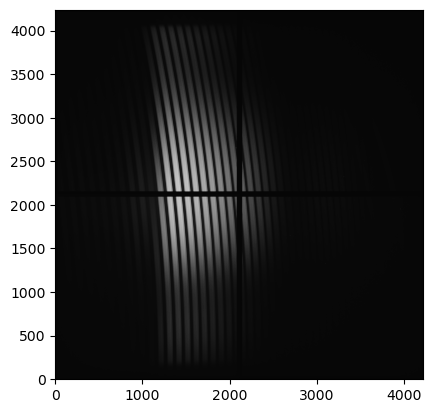

In [ ]:
plt.imshow(image_data, cmap='gray', origin='lower', norm='symlog')

In [ ]:
image_subtracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, hdr=header, arm=arm, amplifier_mode=amp_mode, overscan_range=32)

Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01


In [60]:
ylen, xlen = image_subtracted_bias.shape

In [61]:
filename = os.path.join('/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Trace', f'veloce_{arm}_4amp_no_sim_calib_trace.pkl')
traces = veloce_reduction_tools.Traces.load_traces(filename)

In [81]:
plt.close('all')

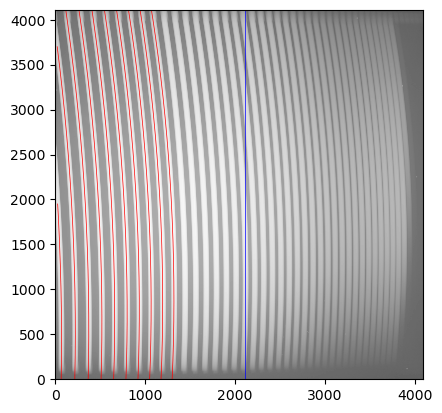

In [121]:
plt.imshow(image_subtracted_bias, cmap='gray', origin='lower', norm='symlog')
i = 0
for x, y, low, up in traces:
    if i<10:
        plt.plot(y, x, color='red', lw=0.5)
    i+=1
    # plt.plot(x-low, y, color='red', lw=0.5)
    # plt.plot(x+up, y, color='red', lw=0.5)
plt.axvline(xlen/2, color='blue', lw=0.5)
# plt.axhline(ylen/2, color='blue', lw=0.5)

In [63]:
extracted_science_orders, extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                            image_subtracted_bias, traces, remove_background=False)

In [90]:
order_nums, coeffs, fix_traces = veloce_reduction_tools.load_prefitted_wavecalib_trace(arm=arm, calib_type='Th', trace_path=veloce_paths.trace_dir)

In [103]:
pixel_ranges = [trace[0] for trace in fix_traces]
pixel_ranges = pixel_ranges[1:]

In [97]:
len(pixel_ranges), len(extracted_science_orders)

(30, 29)

In [104]:
for pix, order in zip(pixel_ranges, extracted_science_orders):
    print(len(pix), len(order))

3451 3451
3450 3450
3451 3451
3450 3450
3451 3451
3450 3450
3451 3451
3451 3451
3450 3450
3451 3451
3450 3450
3451 3451
3451 3451
3451 3451
2901 2901
2201 2201
2166 2166
2133 2133
2100 2100
2066 2066
2033 2033
2001 2001
2000 2000
2001 2001
2000 2000
2001 2001
2000 2000
2000 2000
2001 2001


In [155]:
%matplotlib widget

In [156]:
plt.close('all')

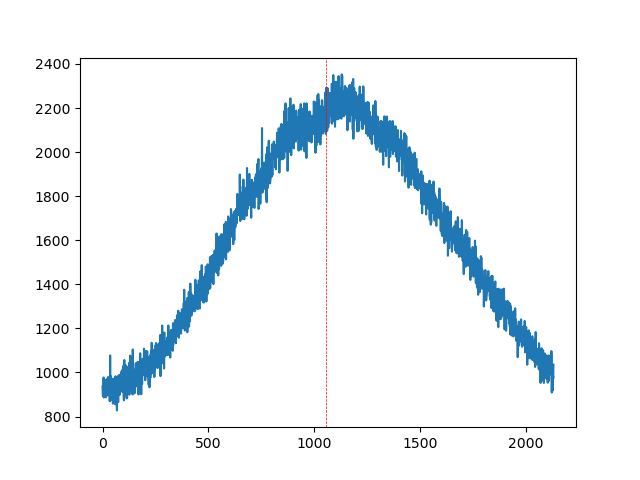

In [165]:
# for i, order in enumerate(extracted_science_orders):
plt.close()
i = 17
order = extracted_science_orders[i]
plt.plot(order, label=f'order {i+1}')
# jump = np.argmax(abs(np.diff(order)))
jump = np.where(pixel_ranges[i] == ylen/2-1)[0][0]
plt.axvline(x=jump, color='red', lw=0.5, ls='--')
order_len = len(order)
# jump_2 = int(jump-5) + np.argmax(abs(np.diff(order[int(jump-5):int(jump+5)])))
# plt.axvline(x=jump_2, color='green', lw=0.5, ls='--')
# plt.axvline(x=order_len/2, color='blue', lw=0.5, ls='--')
plt.show()
# plt.clf()

In [ ]:
# def determine_gain_ratios_v(extracted_science_orders):
#     """
#     Red arm gain ratios for vertical amplifier mode.
#     """
#     gain_ratios = []
#     for i, order in enumerate(extracted_science_orders):
#         jump = np.argmax(abs(np.diff(order)))
#         gain_ratios.append(order[jump]/order[jump+1])
#     gain_ratios = np.array(gain_ratios)

#     return np.median(gain_ratios[1:16]), np.median(gain_ratios[18:31])

In [ ]:
# def determine_gain_ratios_v(extracted_science_orders):
#     """
#     Green arm gain ratios for vertical amplifier mode.
#     """
#     gain_ratios = []
#     for i, order in enumerate(extracted_science_orders):
#         if len(order) > 4000:
#             jump = int(ylen/2-5) + np.argmax(abs(np.diff(order[int(ylen/2-5):int(ylen/2+5)])))
#             gain_ratios.append(order[jump]/order[jump+1])
#         else:
#             gain_ratios.append(np.nan)
#         # jump = np.argmax(abs(np.diff(order)))
#         # gain_ratios.append(order[jump]/order[jump+1])
#     gain_ratios = np.array(gain_ratios)

#     return np.nanmedian(gain_ratios[2:15]), np.nanmedian(gain_ratios[17:36])

In [166]:
def determine_gain_ratios_v(extracted_science_orders, pixel_ranges, ylen):
    """
    Blue arm gain ratios for vertical amplifier mode.
    """
    gain_ratios = []
    for i, order in enumerate(extracted_science_orders):
            # jump = int(ylen/2-5) + np.argmax(abs(np.diff(order[int(ylen/2-5):int(ylen/2+5)])))
        jump = np.where(pixel_ranges[i] == ylen/2-1)[0][0]
        gain_ratios.append(order[jump]/order[jump+1])
        # else:
        #     gain_ratios.append(np.nan)
        # jump = np.argmax(abs(np.diff(order)))
        # gain_ratios.append(order[jump]/order[jump+1])
    gain_ratios = np.array(gain_ratios)

    return np.nanmedian(gain_ratios[:10]), np.nanmedian(gain_ratios[11:16])

In [ ]:
# night = '230827'
# ccd = 'ccd_3'
amp_mode = 4
Q2_Q1 = []
Q3_Q4 = []
for night in obs_list[f'flat_{arm}'].keys():
    for filename in obs_list[f'flat_{arm}'][night]:
        print(filename)
        flat_filename =  os.path.join(veloce_paths.input_dir, night, ccd, filename)
        with fits.open(flat_filename) as hdul:
            image_data = hdul[0].data
            header = hdul[0].header
        
        image_subtracted_bias = veloce_reduction_tools.remove_overscan_bias(image_data, hdr=header, arm=arm, amplifier_mode=amp_mode, overscan_range=32)
        if np.std(image_subtracted_bias) > 300:
            extracted_science_orders, extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                                    image_subtracted_bias, traces, remove_background=False)
            # q2_q1, q3_q4 = determine_gain_ratios_v(extracted_science_orders)
            q2_q1, q3_q4 = determine_gain_ratios_v(extracted_science_orders, pixel_ranges, ylen)
            print(q2_q1, q3_q4)
            Q2_Q1.append(q2_q1)
            Q3_Q4.append(q3_q4)
        else:
            print('bad flat')
            continue


24aug10040.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9929700994826954 0.9884643574137216
24aug10041.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9911662393596743 0.9866135522617431
24aug10042.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9917144130311379 0.9932449819866187
24aug10043.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9906596342617664 0.9889734582357534
24aug10044.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9907155777005909 0.9903545193229
24aug10045.fits
Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
0.9885369733711237 0.9879525619075458
24aug10046.fits
Gain for quadrant 1: 1.01
Gain for quad

In [134]:
Q2_Q1 = np.array(Q2_Q1)
print(np.median(Q2_Q1), np.std(Q2_Q1))

0.9908149129536034 0.0017582574942187328


In [168]:
Q2_Q1 = np.array(Q2_Q1)
print(np.median(Q2_Q1), np.std(Q2_Q1))

0.9908149129536034 0.0017582574942187328


In [135]:
Q3_Q4 = np.array(Q3_Q4)
print(np.median(Q3_Q4), np.std(Q3_Q4))

0.9852234382084217 0.012010565963217566


In [169]:
Q3_Q4 = np.array(Q3_Q4)
print(np.median(Q3_Q4), np.std(Q3_Q4))

0.9888393594188543 0.005969454407346313


In [151]:
%matplotlib inline

In [152]:
plt.close('all')

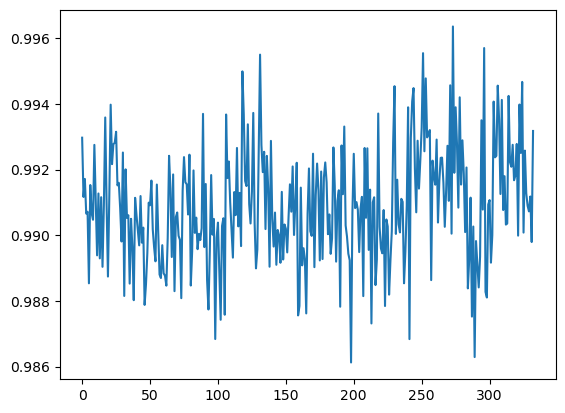

In [153]:
# plt.plot(Q2_Q1[abs(Q2_Q1-np.median(Q2_Q1)<np.std(Q2_Q1))], label='Q2/Q1')
plt.plot(Q2_Q1, label='Q2/Q1')

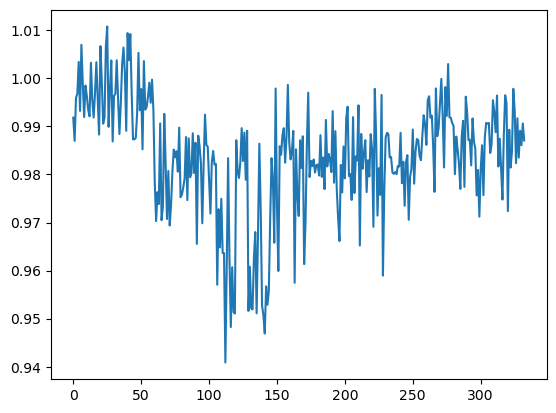

In [154]:
# plt.plot(Q3_Q4[abs(Q3_Q4-np.median(Q3_Q4)<np.std(Q3_Q4))], label='Q3/Q4')
plt.plot(Q3_Q4, label='Q3/Q4')

In [ ]:
# %matplotlib widget

In [241]:
plt.close('all')

Determined gain rations for red are:
- Q2 / Q1 = 1.0616 +/- 0.0006
- Q3 / Q4 = 1.0447 +/- 0.0016
- Q4 / Q1 = 1.0410 +/- 0.0023
Determined gain rations for green are:
- Q2 / Q1 = 1.0134 +/- 0.0014
- Q3 / Q4 = 1.0134 +/- 0.0022
- Q4 / Q1 = 1.0021 +/- 0.0039
Determined gain rations for blue are:
- Q2 / Q1 = 0.9908 +/- 0.0018
- Q3 / Q4 = 0.989  +/- 0.006
- Q4 / Q1 = 0.9945 +/- 0.0019

2 amp mode:
Determined gain rations for red are:
- R (H2) / L (H1) = 1.0302 +/- 0.0038
Determined gain rations for green are:
- R (H2) / L (H1) = 1.0123 +/- 0.0035
Determined gain rations for blue are:
- R (H2) / L (H1) = 0.9970 +/- 0.0018

In [105]:
1/1.0302

0.9706853038245001

### Verifying approach

In [107]:
# night = '230826'
night = '240410'
filename = obs_list[f'flat_{arm}'][night][0]

In [108]:
flat_filename =  os.path.join(veloce_paths.input_dir, night, ccd, filename)
with fits.open(flat_filename) as hdul:
    image_data = hdul[0].data
    header = hdul[0].header

In [ ]:
filename = os.path.join('/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Trace', f'veloce_{arm}_4amp_no_sim_calib_trace.pkl')
traces = veloce_reduction_tools.Traces.load_traces(filename)

FileNotFoundError: File /home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Trace/veloce_red_2amp_no_sim_calib_trace.pkl does not exist.

In [ ]:
def determine_amplifier_mode(hdr):
    """
    Determines the amplifier mode (2 or 4) and gain for quadrant (or half) number 1 from the FITS header.

    Parameters:
    - header (astropy.io.fits.Header): The FITS header.
    Returns:
    - amplifier_mode (int): The amplifier mode, either 2 or 4.
    - gain (float): The gain value for the first amplifier.
    """
    gains = []
    for n in range(1, 5):
        try:
            gains.append(float(hdr[f'DETA{n}GN']))
        except KeyError:
            print(f'Gain for amplifier {n} not found in header.')            
    amplifier_mode = len(gains)
    if amplifier_mode not in [2, 4]:
        raise ValueError("Invalid amplifier mode. Amplifier mode must be 2 or 4.")
    gains = np.array(gains)
    if not np.all(gains == gains[0]):
        print(f'[Warining]: Gains are not equal: {gains}')

    return amplifier_mode, gains[0]

def remove_overscan_bias(frame, hdr, arm, amplifier_mode, overscan_range=32):
    """
    Removes the overscan bias from an image frame by subtracting the median of the overscan regions.

    The function divides the image into four quadrants (top left, bottom left, top right, bottom right),
    calculates the median value of the overscan regions for each quadrant, and subtracts this value from the quadrant.
    The overscan regions are defined by the `overscan_range` parameter and are located at the edges and middle of the image.
    After processing, the quadrants are recombined, and any negative values are set to zero.

    Parameters:
    - frame (numpy.ndarray): The input image frame as a 2D numpy array.
    - overscan_range (int, optional): The width of the overscan region to be removed. Defaults to 32 pixels.

    Returns:
    - numpy.ndarray: The image frame with overscan and bias removed, with negative values set to zero.

    Note:
    - The function assumes the image is divided into quadrants symmetrically.
    - The input frame is modified in place for each quadrant before recombination.
    """
    amp_mode, gain = determine_amplifier_mode(hdr)

    if amplifier_mode != amp_mode:
        raise ValueError(f"Detected amplifier mode ({amp_mode}) does not match amplifier mode from config ({amplifier_mode}).")

    ylen, xlen = frame.shape
    xdiv, ydiv = int(xlen/2), int(ylen/2)

    # overscan_mask = np.zeros_like(frame)
    if amplifier_mode == 4:
        if arm == 'red':
            gain_ratio_q2_q1 = 1.0616 # +/- 0.0006
            gain_ratio_q3_q4 = 1.0447 # +/- 0.0016
            gain_ratio_q4_q1 = 1.0410 # +/- 0.0023
        elif arm == 'green':
            gain_ratio_q2_q1 = 1.0134 # +/- 0.0014
            gain_ratio_q3_q4 = 1.0134 # +/- 0.0022
            gain_ratio_q4_q1 = 1.0021 # +/- 0.0039
        elif arm == 'blue':
            gain_ratio_q2_q1 = 0.9908 # +/- 0.0018
            gain_ratio_q3_q4 = 0.989  # +/- 0.006
            gain_ratio_q4_q1 = 0.9945 # +/- 0.0019
        # top left - Q1
        q1 = frame[ydiv+overscan_range:ylen-overscan_range,overscan_range:xdiv-overscan_range].copy().astype(np.float64) 
        q1_overscan_mask = np.zeros_like(frame)
        # middle
        q1_overscan_mask[ydiv:,xdiv-overscan_range:xdiv] = 1
        q1_overscan_mask[ydiv:ydiv+overscan_range,:xdiv] = 1
        # edge
        q1_overscan_mask[ydiv:,:overscan_range] = 1
        q1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        q1 -= np.median(frame[q1_overscan_mask == 1])
        q1[q1 < 0] = 0
        q1_gain = gain
        print(f'Gain for quadrant 1: {q1_gain}')
        q1 /= q1_gain

        # bottom left - Q2
        q2 = frame[overscan_range:ydiv-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        q2_overscan_mask = np.zeros_like(frame)
        # middle
        q2_overscan_mask[:ydiv,xdiv-overscan_range:xdiv] = 1
        q2_overscan_mask[ydiv-overscan_range:ydiv,:xdiv] = 1
        # edge
        q2_overscan_mask[:ydiv,:overscan_range] = 1
        q2_overscan_mask[:overscan_range,:xdiv] = 1
        q2 -= np.median(frame[q2_overscan_mask == 1])
        q2[q2 < 0] = 0
        # q2_gain = float(hdr['DETA1GN'])
        q2_gain = q1_gain * gain_ratio_q2_q1
        print(f'Gain for quadrant 2: {q2_gain}')
        q2 /= q2_gain

        # bottom right - Q3
        q3 = frame[overscan_range:ydiv-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q3_overscan_mask = np.zeros_like(frame)
        # middle
        q3_overscan_mask[:ydiv,xdiv:xdiv+overscan_range] = 1
        q3_overscan_mask[ydiv-overscan_range:ydiv,xdiv:] = 1
        # edge
        q3_overscan_mask[:ydiv,xlen-overscan_range:] = 1
        q3_overscan_mask[:overscan_range,xdiv:] = 1
        q3 -= np.median(frame[q3_overscan_mask == 1])
        q3[q3 < 0] = 0
        # q3_gain = float(hdr['DETA3GN'])
        q3_gain = q1_gain * gain_ratio_q4_q1 * gain_ratio_q3_q4
        print(f'Gain for quadrant 3: {q3_gain}')
        q3 /= q3_gain

        # top right - Q4
        q4 = frame[ydiv+overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q4_overscan_mask = np.zeros_like(frame)
        # middle
        q4_overscan_mask[ydiv:,xdiv:xdiv+overscan_range] = 1
        q4_overscan_mask[ydiv:ydiv+overscan_range,xdiv:] = 1
        # edge
        q4_overscan_mask[ydiv:,xlen-overscan_range:] = 1
        q4_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        q4 -= np.median(frame[q4_overscan_mask == 1])
        q4[q4 < 0] = 0
        # q4_gain = float(hdr['DETA4GN'])
        q4_gain = q1_gain * gain_ratio_q4_q1
        print(f'Gain for quadrant 4: {q4_gain}')
        q4 /= q4_gain

        image_substracted_bias = np.concatenate(
            (np.concatenate((q2, q1), axis=0), 
            np.concatenate((q3, q4), axis=0)),
            axis=1)
        
    elif amplifier_mode == 2:
        ### right/left gain ratio
        if arm == 'red':
            gain_ratio = 1.0302 # +/- 0.0038
        elif arm == 'green':
            gain_ratio = 1.0123 # +/- 0.0035
        elif arm == 'blue':
            gain_ratio = 0.9970 # +/- 0.0018
        
        ### left - H1
        h1 = frame[overscan_range:ylen-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        h1_overscan_mask = np.zeros_like(frame)
        ### middle
        h1_overscan_mask[:,xdiv-overscan_range:xdiv] = 1
        ### edge
        h1_overscan_mask[:,:overscan_range] = 1
        h1_overscan_mask[:overscan_range,:xdiv] = 1
        h1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        h1 -= np.median(frame[h1_overscan_mask == 1])
        h1[h1 < 0] = 0
        h1_gain = float(hdr['DETA1GN'])
        print(f'Gain for half 1: {h1_gain}')
        h1 /= h1_gain

        ### right - H2
        h2 = frame[overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        h2_overscan_mask = np.zeros_like(frame)
        ### middle
        h2_overscan_mask[:,xdiv:xdiv+overscan_range] = 1
        ### edge
        h2_overscan_mask[:,:overscan_range] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2 -= np.median(frame[h2_overscan_mask == 1])
        h2[h2 < 0] = 0
        # h2_gain = float(hdr['DETA2GN'])
        h2_gain = h1_gain * gain_ratio
        print(f'Gain for half 2: {h2_gain}')
        h2 /= h2_gain

        image_substracted_bias = np.concatenate((h1, h2), axis=1)
    else:
        raise ValueError("Invalid amplifier mode. Amplifier mode must be 2 or 4.")
    
    return image_substracted_bias

In [17]:
def old_remove_overscan_bias(frame, hdr, amplifier_mode, overscan_range=32):
    """
    Removes the overscan bias from an image frame by subtracting the median of the overscan regions.

    The function divides the image into four quadrants (top left, bottom left, top right, bottom right),
    calculates the median value of the overscan regions for each quadrant, and subtracts this value from the quadrant.
    The overscan regions are defined by the `overscan_range` parameter and are located at the edges and middle of the image.
    After processing, the quadrants are recombined, and any negative values are set to zero.

    Parameters:
    - frame (numpy.ndarray): 
    Returns:
    - numpy.ndarray: The image frame with overscan and bias removed, with negative values set to zero.

    Note:
    - The function assumes the image is divided into quadrants symmetrically.
    - The input frame is modified in place for each quadrant before recombination.
    """
    ylen, xlen = frame.shape
    xdiv, ydiv = int(xlen/2), int(ylen/2)

    # overscan_mask = np.zeros_like(frame)
    if amplifier_mode == 4:
        # top left - Q1
        q1 = frame[ydiv+overscan_range:ylen-overscan_range,overscan_range:xdiv-overscan_range].copy().astype(np.float64) 
        q1_overscan_mask = np.zeros_like(frame)
        # middle
        q1_overscan_mask[ydiv:,xdiv-overscan_range:xdiv] = 1
        q1_overscan_mask[ydiv:ydiv+overscan_range,:xdiv] = 1
        # edge
        q1_overscan_mask[ydiv:,:overscan_range] = 1
        q1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        q1 -= np.median(frame[q1_overscan_mask == 1])
        print(f'Median overscan value for quadrant 1: {np.median(frame[q1_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 1: {np.std(frame[q1_overscan_mask == 1])}')
        q1[q1 < 0] = 0
        q1_gain = float(hdr['DETA1GN'])
        print(f'Gain for quadrant 1: {q1_gain}')
        q1 /= q1_gain

        # bottom left - Q2
        q2 = frame[overscan_range:ydiv-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        q2_overscan_mask = np.zeros_like(frame)
        # middle
        q2_overscan_mask[:ydiv,xdiv-overscan_range:xdiv] = 1
        q2_overscan_mask[ydiv-overscan_range:ydiv,:xdiv] = 1
        # edge
        q2_overscan_mask[:ydiv,:overscan_range] = 1
        q2_overscan_mask[:overscan_range,:xdiv] = 1
        q2 -= np.median(frame[q2_overscan_mask == 1])
        print(f'Median overscan value for quadrant 2: {np.median(frame[q2_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 2: {np.std(frame[q2_overscan_mask == 1])}')
        q2[q2 < 0] = 0
        q2_gain = float(hdr['DETA2GN'])
        # q2_gain = q2_gain
        print(f'Gain for quadrant 2: {q2_gain}')
        q2 /= q2_gain

        # bottom right - Q3
        q3 = frame[overscan_range:ydiv-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q3_overscan_mask = np.zeros_like(frame)
        # middle
        q3_overscan_mask[:ydiv,xdiv:xdiv+overscan_range] = 1
        q3_overscan_mask[ydiv-overscan_range:ydiv,xdiv:] = 1
        # edge
        q3_overscan_mask[:ydiv,xlen-overscan_range:] = 1
        q3_overscan_mask[:overscan_range,xdiv:] = 1
        q3 -= np.median(frame[q3_overscan_mask == 1])
        print(f'Median overscan value for quadrant 3: {np.median(frame[q3_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 3: {np.std(frame[q3_overscan_mask == 1])}')
        q3[q3 < 0] = 0
        q3_gain = float(hdr['DETA3GN'])
        # q3_gain = q3_gain
        print(f'Gain for quadrant 3: {q3_gain}')
        q3 /= q3_gain

        # top right - Q4
        q4 = frame[ydiv+overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q4_overscan_mask = np.zeros_like(frame)
        # middle
        q4_overscan_mask[ydiv:,xdiv:xdiv+overscan_range] = 1
        q4_overscan_mask[ydiv:ydiv+overscan_range,xdiv:] = 1
        # edge
        q4_overscan_mask[ydiv:,xlen-overscan_range:] = 1
        q4_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        q4 -= np.median(frame[q4_overscan_mask == 1])
        print(f'Median overscan value for quadrant 4: {np.median(frame[q4_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 4: {np.std(frame[q4_overscan_mask == 1])}')
        q4[q4 < 0] = 0
        q4_gain = float(hdr['DETA4GN'])
        # q4_gain = q4_gain
        print(f'Gain for quadrant 4: {q4_gain}')
        q4 /= q4_gain

        image_substracted_bias = np.concatenate(
            (np.concatenate((q2, q1), axis=0), 
            np.concatenate((q3, q4), axis=0)),
            axis=1)
        
    elif amplifier_mode == 2:
        # right/left gain ratio
        # gain_scale = 0.964 
        
        # left - H1
        h1 = frame[overscan_range:ylen-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        h1_overscan_mask = np.zeros_like(frame)
        # middle
        h1_overscan_mask[:,xdiv-overscan_range:xdiv] = 1
        # edge
        h1_overscan_mask[:,:overscan_range] = 1
        h1_overscan_mask[:overscan_range,:xdiv] = 1
        h1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        h1 -= np.median(frame[h1_overscan_mask == 1])
        h1[h1 < 0] = 0
        h1_gain = float(hdr['DETA1GN'])
        print(f'Gain for half 1: {h1_gain}')
        h1 /= h1_gain

        # right - H2
        h2 = frame[overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        h2_overscan_mask = np.zeros_like(frame)
        # middle
        h2_overscan_mask[:,xdiv:xdiv+overscan_range] = 1
        # edge
        h2_overscan_mask[:,:overscan_range] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2 -= np.median(frame[h2_overscan_mask == 1])
        h2[h2 < 0] = 0
        h2_gain = float(hdr['DETA2GN'])
        # h2_gain = h1_gain * gain_scale
        print(f'Gain for half 2: {h2_gain}')
        h2 /= h2_gain

        image_substracted_bias = np.concatenate((h1, h2), axis=1)
    else:
        raise ValueError("Invalid amplifier mode. Amplifier mode must be 2 or 4.")
    
    return image_substracted_bias

In [18]:
def old_remove_postscan_bias(frame, hdr, amplifier_mode, overscan_range=32):
    """
    Removes the overscan bias from an image frame by subtracting the median of the overscan regions.

    The function divides the image into four quadrants (top left, bottom left, top right, bottom right),
    calculates the median value of the overscan regions for each quadrant, and subtracts this value from the quadrant.
    The overscan regions are defined by the `overscan_range` parameter and are located at the edges and middle of the image.
    After processing, the quadrants are recombined, and any negative values are set to zero.

    Parameters:
    - frame (numpy.ndarray): 
    Returns:
    - numpy.ndarray: The image frame with overscan and bias removed, with negative values set to zero.

    Note:
    - The function assumes the image is divided into quadrants symmetrically.
    - The input frame is modified in place for each quadrant before recombination.
    """
    ylen, xlen = frame.shape
    xdiv, ydiv = int(xlen/2), int(ylen/2)

    # overscan_mask = np.zeros_like(frame)
    if amplifier_mode == 4:
        # top left - Q1
        q1 = frame[ydiv+overscan_range:ylen-overscan_range,overscan_range:xdiv-overscan_range].copy().astype(np.float64) 
        q1_overscan_mask = np.zeros_like(frame)
        # middle
        q1_overscan_mask[ydiv:ylen-overscan_range,xdiv-overscan_range:xdiv] = 1
        q1_overscan_mask[ydiv:ydiv+overscan_range,overscan_range:xdiv] = 1
        # edge
        # q1_overscan_mask[ydiv:,:overscan_range] = 1
        # q1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        q1 -= np.median(frame[q1_overscan_mask == 1])
        print(f'Median overscan value for quadrant 1: {np.median(frame[q1_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 1: {np.std(frame[q1_overscan_mask == 1])}')
        q1[q1 < 0] = 0
        q1_gain = float(hdr['DETA1GN'])
        print(f'Gain for quadrant 1: {q1_gain}')
        q1 /= q1_gain

        # bottom left - Q2
        q2 = frame[overscan_range:ydiv-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        q2_overscan_mask = np.zeros_like(frame)
        # middle
        q2_overscan_mask[overscan_range:ydiv,xdiv-overscan_range:xdiv] = 1
        q2_overscan_mask[ydiv-overscan_range:ydiv,overscan_range:xdiv] = 1
        # edge
        # q2_overscan_mask[:ydiv,:overscan_range] = 1
        # q2_overscan_mask[:overscan_range,:xdiv] = 1
        q2 -= np.median(frame[q2_overscan_mask == 1])
        print(f'Median overscan value for quadrant 2: {np.median(frame[q2_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 2: {np.std(frame[q2_overscan_mask == 1])}')
        q2[q2 < 0] = 0
        q2_gain = float(hdr['DETA2GN'])
        # q2_gain = q2_gain
        print(f'Gain for quadrant 2: {q2_gain}')
        q2 /= q2_gain

        # bottom right - Q3
        q3 = frame[overscan_range:ydiv-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q3_overscan_mask = np.zeros_like(frame)
        # middle
        q3_overscan_mask[overscan_range:ydiv,xdiv:xdiv+overscan_range] = 1
        q3_overscan_mask[ydiv-overscan_range:ydiv,xdiv:xlen-overscan_range] = 1
        # edge
        # q3_overscan_mask[:ydiv,xlen-overscan_range:] = 1
        # q3_overscan_mask[:overscan_range,xdiv:] = 1
        q3 -= np.median(frame[q3_overscan_mask == 1])
        print(f'Median overscan value for quadrant 3: {np.median(frame[q3_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 3: {np.std(frame[q3_overscan_mask == 1])}')
        q3[q3 < 0] = 0
        q3_gain = float(hdr['DETA3GN'])
        # q3_gain = q3_gain
        print(f'Gain for quadrant 3: {q3_gain}')
        q3 /= q3_gain

        # top right - Q4
        q4 = frame[ydiv+overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        q4_overscan_mask = np.zeros_like(frame)
        # middle
        q4_overscan_mask[ydiv:ylen-overscan_range,xdiv:xdiv+overscan_range] = 1
        q4_overscan_mask[ydiv:ydiv+overscan_range,xdiv:xlen-overscan_range] = 1
        # edge
        # q4_overscan_mask[ydiv:,xlen-overscan_range:] = 1
        # q4_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        q4 -= np.median(frame[q4_overscan_mask == 1])
        print(f'Median overscan value for quadrant 4: {np.median(frame[q4_overscan_mask == 1])}')
        print(f'Stdev overscan value for quadrant 4: {np.std(frame[q4_overscan_mask == 1])}')
        q4[q4 < 0] = 0
        q4_gain = float(hdr['DETA4GN'])
        # q4_gain = q4_gain
        print(f'Gain for quadrant 4: {q4_gain}')
        q4 /= q4_gain

        image_substracted_bias = np.concatenate(
            (np.concatenate((q2, q1), axis=0), 
            np.concatenate((q3, q4), axis=0)),
            axis=1)
        
    elif amplifier_mode == 2:
        # right/left gain ratio
        # gain_scale = 0.964 
        
        # left - H1
        h1 = frame[overscan_range:ylen-overscan_range, overscan_range:xdiv-overscan_range].copy().astype(np.float64)
        h1_overscan_mask = np.zeros_like(frame)
        # middle
        h1_overscan_mask[:,xdiv-overscan_range:xdiv] = 1
        # edge
        h1_overscan_mask[:,:overscan_range] = 1
        h1_overscan_mask[:overscan_range,:xdiv] = 1
        h1_overscan_mask[ylen-overscan_range:,:xdiv] = 1
        h1 -= np.median(frame[h1_overscan_mask == 1])
        h1[h1 < 0] = 0
        h1_gain = float(hdr['DETA1GN'])
        print(f'Gain for half 1: {h1_gain}')
        h1 /= h1_gain

        # right - H2
        h2 = frame[overscan_range:ylen-overscan_range,xdiv+overscan_range:xlen-overscan_range].copy().astype(np.float64)
        h2_overscan_mask = np.zeros_like(frame)
        # middle
        h2_overscan_mask[:,xdiv:xdiv+overscan_range] = 1
        # edge
        h2_overscan_mask[:,:overscan_range] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2_overscan_mask[ylen-overscan_range:,xdiv:] = 1
        h2 -= np.median(frame[h2_overscan_mask == 1])
        h2[h2 < 0] = 0
        h2_gain = float(hdr['DETA2GN'])
        # h2_gain = h1_gain * gain_scale
        print(f'Gain for half 2: {h2_gain}')
        h2 /= h2_gain

        image_substracted_bias = np.concatenate((h1, h2), axis=1)
    else:
        raise ValueError("Invalid amplifier mode. Amplifier mode must be 2 or 4.")
    
    return image_substracted_bias

In [19]:
image_subtracted_bias = old_remove_overscan_bias(image_data, hdr=header, amplifier_mode=amp_mode, overscan_range=32)
image_subtracted_postscan_bias = old_remove_postscan_bias(image_data, hdr=header, amplifier_mode=amp_mode, overscan_range=32)
# processed_image = remove_overscan_bias(image_data, header, arm, amp_mode, overscan_range=32)

Median overscan value for quadrant 1: 1004.0
Stdev overscan value for quadrant 1: 3.3798292339470697
Gain for quadrant 1: 1.01
Median overscan value for quadrant 2: 1006.0
Stdev overscan value for quadrant 2: 3.4346642725344947
Gain for quadrant 2: 1.01
Median overscan value for quadrant 3: 1005.0
Stdev overscan value for quadrant 3: 3.186444523330742
Gain for quadrant 3: 1.01
Median overscan value for quadrant 4: 1003.0
Stdev overscan value for quadrant 4: 7.652355123867609
Gain for quadrant 4: 1.01
Median overscan value for quadrant 1: 1005.0
Stdev overscan value for quadrant 1: 3.600880460185725
Gain for quadrant 1: 1.01
Median overscan value for quadrant 2: 1006.0
Stdev overscan value for quadrant 2: 3.485824597151115
Gain for quadrant 2: 1.01
Median overscan value for quadrant 3: 1005.0
Stdev overscan value for quadrant 3: 3.169853620356232
Gain for quadrant 3: 1.01
Median overscan value for quadrant 4: 1003.0
Stdev overscan value for quadrant 4: 10.35824983944675
Gain for quadran

In [114]:
np.std(image_subtracted_bias)

4630.019578794266

In [115]:
plt.close('all')

In [116]:
%matplotlib inline

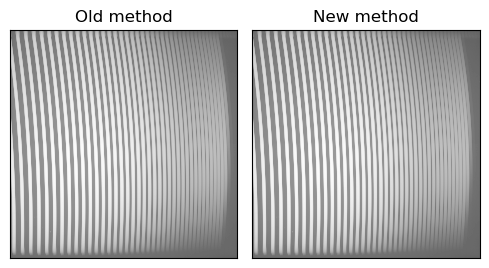

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(5, 10))
ax[0].imshow(image_subtracted_bias, cmap='gray', origin='lower', norm='symlog')
# ax[1].imshow(processed_image, cmap='gray', origin='lower', norm='symlog')
ax[1].imshow(image_subtracted_postscan_bias, cmap='gray', origin='lower', norm='symlog')
ax[0].set_title('Old method')
ax[1].set_title('New method')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()

In [118]:
old_extracted_science_orders, old_extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                            image_subtracted_bias, traces, remove_background=False)
extracted_science_orders, extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                            processed_image, traces, remove_background=False)


In [119]:
# %matplotlib widget
%matplotlib inline

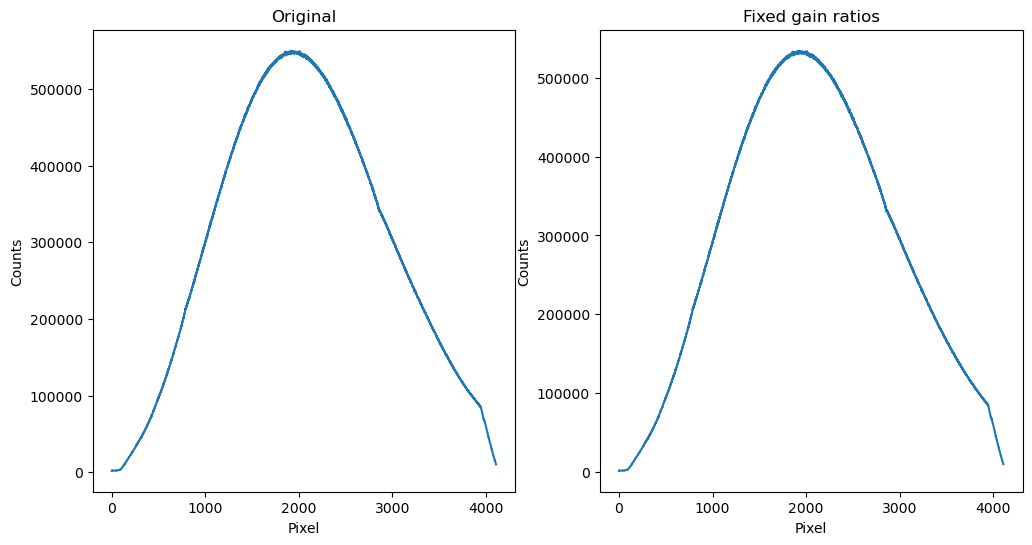

In [ ]:
i = 17
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(old_extracted_science_orders[i])
ax[0].set_title('Original')
ax[1].set_title('Fixed gain ratios')
ax[1].set_xlabel('Pixel')
ax[0].set_xlabel('Pixel')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[1].plot(extracted_science_orders[i])
plt.savefig('gain_ratios_extracted_orders_comparison.png', dpi=300, bbox_inches='tight')

In [130]:
%matplotlib widget

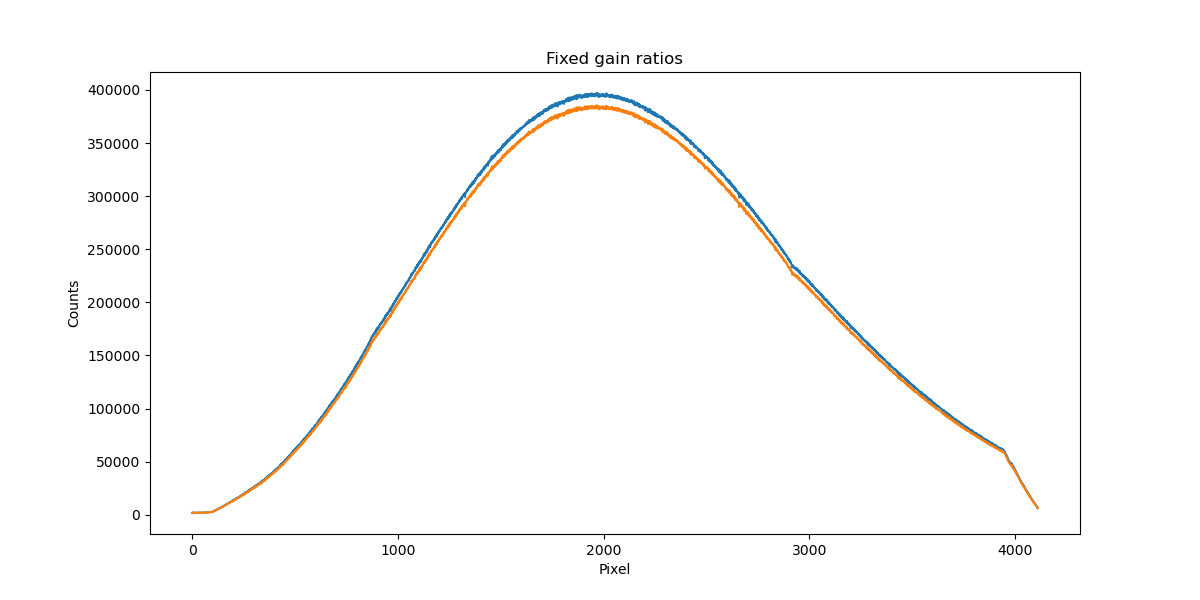

In [134]:
i = 19
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(old_extracted_science_orders[i])
ax.set_title('Original')
ax.set_title('Fixed gain ratios')
ax.set_xlabel('Pixel')
ax.set_xlabel('Pixel')
ax.set_ylabel('Counts')
ax.set_ylabel('Counts')
ax.plot(extracted_science_orders[i])
# plt.savefig('gain_ratios_extracted_orders_comparison.png', dpi=300, bbox_inches='tight')

In [135]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4224 / length of data axis 1                          
NAXIS2  =                 4176 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
LONGSTRN= 'OGIP 1.0'           / The HEASARC Long String Convention may be used.
COMMENT   This FITS file may contain long string keyword values that are        
COMMENT   continued over mul

In [136]:
header['DETA1GN']

'1.01'

In [137]:
header['DETA2GN']

'1.01'

In [ ]:
amplifier_mode, gain = determine_amplifier_mode(header)

Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.


In [145]:
amplifier_mode

2

In [146]:
gains

[1.01, 1.01]

In [150]:
gains = np.array(gains)

In [153]:
np.all(gains == gains[0])

True

In [152]:
gains[0]

1.01

In [ ]:
# table_1 = np.array([8.01, 7.67, 7.3, 6.95, 7.28, 7.31, 7.29, 7.43, 7.44, 7.51])
# ref = np.ones_like(table_1) * 7.5
# table_2 = np.array([0.029, 0.010, -0.012, -0.033, -0.013, -0.011, -0.012, 0.004, -0.004, 0.000])
# print(table_2-(table_1-ref))

[-0.481 -0.16   0.188  0.517  0.207  0.179  0.198  0.074  0.056 -0.01 ]
